# 0. 라이브러리 및 데이터 불러오기

In [ ]:
import pandas as pd
import random
import os
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error

In [ ]:
import random
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

In [ ]:
le = LabelEncoder()

In [ ]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(42) # Seed 고정

In [ ]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [ ]:
train

,id,temperature,pressure,humidity,wind_speed,wind_direction,precipitation,snowing,cloudiness,target
0,TRAIN_00000,27.8816,1013.6,46.8,2.4,232.4,0.00,False,0.0,1.180
1,TRAIN_00001,5.7540,1026.6,76.6,3.6,172.0,0.00,False,8.8,8.581
2,TRAIN_00002,20.8220,1016.2,64.8,2.2,206.0,0.06,False,23.0,3.978
3,TRAIN_00003,20.0758,1017.4,72.6,0.8,215.4,0.00,False,0.0,8.301
4,TRAIN_00004,7.5260,1023.2,82.8,1.2,158.0,0.00,False,15.0,1.692
5,TRAIN_00005,24.8500,1011.2,64.6,2.2,126.0,0.00,False,0.0,1.971
6,TRAIN_00006,32.9420,1016.8,35.8,3.8,166.0,0.00,False,16.0,7.179
7,TRAIN_00007,14.8120,1006.8,73.0,4.0,172.0,0.12,False,60.0,9.110
8,TRAIN_00008,12.3210,1025.8,66.6,1.0,170.4,0.00,False,2.8,12.238
9,TRAIN_00009,20.7706,1004.4,67.0,1.4,215.2,0.00,False,11.2,7.333


In [ ]:
test

,id,temperature,pressure,humidity,wind_speed,wind_direction,precipitation,snowing,cloudiness
0,TEST_00000,20.702000,1021.0,76.4,2.0,104.8,0.00,False,23.0
1,TEST_00001,18.673669,1014.4,59.6,2.4,179.2,0.12,False,32.4
2,TEST_00002,29.908000,1020.6,49.6,2.6,78.0,0.60,False,23.0
3,TEST_00003,24.504000,1014.6,61.0,1.8,118.0,0.00,False,15.0
4,TEST_00004,12.590000,1011.4,70.8,1.8,110.0,0.12,False,34.0
5,TEST_00005,14.078000,1014.6,79.8,1.2,100.0,0.00,False,41.0
6,TEST_00006,10.510000,1008.4,49.2,2.0,62.0,0.00,False,12.0
7,TEST_00007,11.004000,999.4,78.0,3.0,228.6,0.36,False,60.0
8,TEST_00008,11.789731,1029.2,42.4,2.4,109.6,0.00,False,0.0
9,TEST_00009,17.182000,1020.4,73.4,1.0,70.0,0.00,False,12.0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10 non-null     object 
 1   temperature     10 non-null     float64
 2   pressure        10 non-null     float64
 3   humidity        10 non-null     float64
 4   wind_speed      10 non-null     float64
 5   wind_direction  10 non-null     float64
 6   precipitation   10 non-null     float64
 7   snowing         10 non-null     bool   
 8   cloudiness      10 non-null     float64
 9   target          10 non-null     float64
dtypes: bool(1), float64(8), object(1)
memory usage: 858.0+ bytes


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10 non-null     object 
 1   temperature     10 non-null     float64
 2   pressure        10 non-null     float64
 3   humidity        10 non-null     float64
 4   wind_speed      10 non-null     float64
 5   wind_direction  10 non-null     float64
 6   precipitation   10 non-null     float64
 7   snowing         10 non-null     bool   
 8   cloudiness      10 non-null     float64
dtypes: bool(1), float64(7), object(1)
memory usage: 778.0+ bytes


결측치는 없음.

# 1. 전처리

<Axes: xlabel='pressure'>

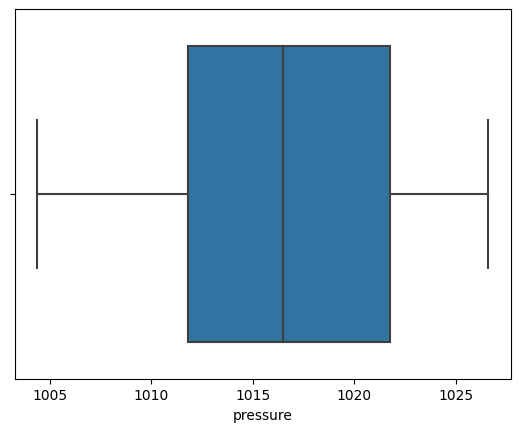

In [ ]:
sns.boxplot(x='pressure', data=train)

<Axes: xlabel='pressure'>

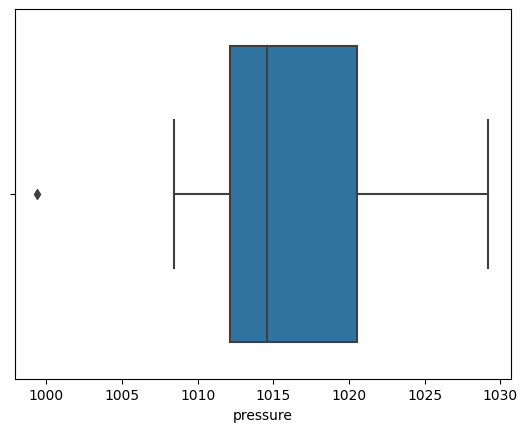

In [ ]:
sns.boxplot(x='pressure', data=test)

train과 test에 많은 이상치들이 잡힌다.

이들을 이상치를 제외한 train 데이터의 pressure 칼럼 평균값으로 대체한다.(data leak를 피하기 위해 test역시 train데이터를 기준으로 전처리해줌.)

여기서 기압의 이상치란, 보통 대기상에서 잡히는 기압이 최저 850에서 최대 1200hpa 정도이므로 850이하, 1200이상인 경우 이상치라고 처리한다.

In [ ]:
index_1 = train[train['pressure'] <=850].index
for i in index_1:
  train['pressure'][i] = 1016.152817
index_1 = test[test['pressure'] <=850].index
for i in index_1:
  test['pressure'][i] = 1016.152817


index_1 = train[train['pressure'] >=1100].index
for i in index_1:
  train['pressure'][i] = 1016.152817

index_2 = test[test['pressure'] >=1200].index
for i in index_2:
  test['pressure'][i] = 1016.152817

# 2. 특성공학으로 파생변수 만들기

## 2-1. 대기밀도

In [ ]:
#대기밀도
import math

def air_density(pressure, temperature, relative_humidity):
    """
    Calculate air density in kg/m^3 given pressure in Pa, temperature in K, and relative humidity as a fraction.
    """
    # Calculate saturation vapor pressure
    e_s = 6.1078 * 10 ** ((7.5 * temperature) / (temperature + 237.3))
    # Calculate vapor pressure
    e = relative_humidity * e_s
    # Calculate dry air pressure
    p_dry = pressure - e
    # Calculate air density
    rho = (p_dry / (287.058 * temperature)) + ((e / (287.058 * temperature)) * (1 - 0.378 * (e / p_dry)))
    return rho

train['air_density'] = 0.0
test['air_density'] = 0.0

for i in range(10):
  train['air_density'][i] = air_density(train['pressure'][i],train['temperature'][i],train['humidity'][i])
for i in range(10):
  test['air_density'][i] = air_density(test['pressure'][i],test['temperature'][i],test['humidity'][i])

<ipython-input-60-f8807daee49a>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['air_density'][i] = air_density(train['pressure'][i],train['temperature'][i],train['humidity'][i])
<ipython-input-60-f8807daee49a>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['air_density'][i] = air_density(test['pressure'][i],test['temperature'][i],test['humidity'][i])


## 2-2. 절대습도

In [ ]:
#절대습도

def calculate_absolute_humidity(wind_speed, wind_direction, temperature, pressure, humidity):

    # Calculate dew point temperature
    T = temperature
    RH = 0.5  # Assuming relative humidity of 50%
    a = 17.27
    b = 237.7
    alpha = ((a * T) / (b + T)) + math.log(RH)
    dew_point = (b * alpha) / (a - alpha)

    # Calculate saturation vapor pressure
    e_s = 6.112 * math.exp((17.67 * dew_point) / (dew_point + 243.5))

    # Calculate actual vapor pressure
    e_a = e_s * (humidity / 100)

    # Calculate absolute humidity
    R_d = 287.058  # Specific gas constant for dry air
    R_v = 461.495  # Specific gas constant for water vapor
    T_K = temperature + 273.15  # Temperature in Kelvin
    e_a_Pa = e_a * 100  # Convert vapor pressure to Pascals
    rho_d = (pressure * 100) / (R_d * T_K)  # Density of dry air in kg/m^3
    rho_v = (e_a_Pa / (R_v * T_K))  # Density of water vapor in kg/m^3
    absolute_humidity = (rho_v / (rho_d + rho_v)) * 1000  # Absolute humidity in g/m^3

    return absolute_humidity



train['absolute_humidity'] = 0.0
test['absolute_humidity'] = 0.0


for i in range(10):
  train['absolute_humidity'][i] = calculate_absolute_humidity(train['wind_speed'][i],train['wind_direction'][i],train['temperature'][i],train['pressure'][i],train['humidity'][i])

for i in range(10):
  test['absolute_humidity'][i] = calculate_absolute_humidity(test['wind_speed'][i],test['wind_direction'][i],test['temperature'][i],test['pressure'][i],test['humidity'][i])

<ipython-input-61-79415bb89501>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['absolute_humidity'][i] = calculate_absolute_humidity(train['wind_speed'][i],train['wind_direction'][i],train['temperature'][i],train['pressure'][i],train['humidity'][i])
<ipython-input-61-79415bb89501>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['absolute_humidity'][i] = calculate_absolute_humidity(test['wind_speed'][i],test['wind_direction'][i],test['temperature'][i],test['pressure'][i],test['humidity'][i])


## 2-3. 공기분압

In [ ]:
#공기분압
def calculate_air_pressure(pressure, temperature, relative_humidity):
    R_d = 287.058  # Specific gas constant for dry air
    R_v = 461.495  # Specific gas constant for water vapor
    T_K = temperature + 273.15  # Temperature in Kelvin

    # Calculate saturation vapor pressure
    T_C = temperature  # Temperature in Celsius
    e_s = 6.112 * math.exp((17.67 * T_C) / (T_C + 243.5))

    # Calculate actual vapor pressure
    e = e_s * (relative_humidity / 100)

    # Calculate air density
    rho_d = (pressure * 100) / (R_d * T_K)  # Density of dry air in kg/m^3
    rho_v = (e * 100) / (R_v * T_K)  # Density of water vapor in kg/m^3
    rho = rho_d + rho_v  # Total density of air in kg/m^3

    # Calculate air pressure
    air_pressure = rho * R_d * T_K / 100  # Air pressure in hPa

    return air_pressure

train['air_pressure'] = 0.0
test['air_pressure'] = 0.0


for i in range(10):
  train['air_pressure'][i] = calculate_air_pressure(train['pressure'][i],train['temperature'][i],train['humidity'][i])

for i in range(10):
  test['air_pressure'][i] = calculate_air_pressure(test['pressure'][i],test['temperature'][i],test['humidity'][i])

<ipython-input-62-24a5465b173d>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['air_pressure'][i] = calculate_air_pressure(train['pressure'][i],train['temperature'][i],train['humidity'][i])
<ipython-input-62-24a5465b173d>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['air_pressure'][i] = calculate_air_pressure(test['pressure'][i],test['temperature'][i],test['humidity'][i])


# 3. 스케일링
MaxAbsScaler() 사용

In [ ]:
 # X는 독립변수이므로 종속변수를 제거합니다. 또한 target 이외의 분석에 활용하지 않는 데이터(id)를 제거합니다.
train_x = train.drop(columns=['id', 'target'])
 # y는 종속변수로 값을 설정합니다.
train_y = train['target']

# train에서와 마찬가지로 분석에 활용하지 않는 데이터(id)를 제거합니다.
test_x = test.drop(columns=['id'])

le = LabelEncoder()
le = le.fit(train_x['snowing'])
train_x['snowing'] = le.transform(train_x['snowing'])

for label in np.unique(test_x['snowing']):
    if label not in le.classes_:
        le.classes_ = np.append(le.classes_, label)
    test_x['snowing'] = le.transform(test_x['snowing'])
print('Done.')

Done.


data leak를 피하기 위해서 train_x를 기준으로 scaler한 값을 test에도 적용

In [ ]:
from sklearn.preprocessing import MaxAbsScaler

scaler = MaxAbsScaler()
scaler.fit(train_x)
transformed_train_X = scaler.transform(train_x)
transformed_test_X = scaler.transform(test_x)



# 4. 파라미터 최적화

In [ ]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.6/409.6 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.8/226.8 kB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 9.8 MB/s eta 0:00:00


In [ ]:
import optuna
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# 데이터 로드 및 전처리 (X_train, X_valid, y_train, y_valid)

def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 100, 1000, 10)
    max_depth = trial.suggest_int('max_depth', 1, 50, 1)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 30)
    bootstrap = trial.suggest_categorical('bootstrap', [True, False])


    model = ExtraTreesRegressor(
        n_estimators=n_estimators,
         min_samples_split=min_samples_split,
        max_depth=max_depth,
        bootstrap=bootstrap,
        random_state=42
    )

    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    score = mean_absolute_error(y_valid, preds)
    return score

X_train, X_valid, y_train, y_valid = train_test_split(train_x, train_y, test_size = 0.2)

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=150)

print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)
print('Best score:', study.best_value)

[I 2023-10-28 16:39:21,943] A new study created in memory with name: no-name-266cac40-dbb1-4505-9e38-018af3eab58a
[I 2023-10-28 16:39:22,663] Trial 0 finished with value: 5.876159239926736 and parameters: {'n_estimators': 390, 'max_depth': 35, 'min_samples_split': 4, 'bootstrap': True}. Best is trial 0 with value: 5.876159239926736.
[I 2023-10-28 16:39:23,147] Trial 1 finished with value: 5.316500000000028 and parameters: {'n_estimators': 590, 'max_depth': 10, 'min_samples_split': 9, 'bootstrap': False}. Best is trial 1 with value: 5.316500000000028.
[I 2023-10-28 16:39:24,180] Trial 2 finished with value: 5.348811666666663 and parameters: {'n_estimators': 750, 'max_depth': 41, 'min_samples_split': 17, 'bootstrap': True}. Best is trial 1 with value: 5.316500000000028.
[I 2023-10-28 16:39:24,373] Trial 3 finished with value: 5.3165000000000076 and parameters: {'n_estimators': 220, 'max_depth': 27, 'min_samples_split': 12, 'bootstrap': False}. Best is trial 3 with value: 5.31650000000000

Number of finished trials: 150
Best trial: {'n_estimators': 400, 'max_depth': 27, 'min_samples_split': 16, 'bootstrap': False}
Best score: 5.31649999999997


optuna 실행.

여러번 optuna를 실행한 결과

params = {'n_estimators': 400, 'max_depth': 30, 'min_samples_split': 2, 'bootstrap': False}-1.81297 최고

Best trial: {'n_estimators': 300, 'max_depth': 40, 'min_samples_split': 2, 'bootstrap': False}-1.8170805616

 {'n_estimators': 180, 'max_depth': 44, 'min_samples_split': 2, 'bootstrap': False}-1.8167851207

{'n_estimators': 600, 'max_depth': 25, 'min_samples_split': 2, 'bootstrap': True}-1.9341815716

#5. 학습 및 제출

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn import metrics
params ={'n_estimators': 400, 'max_depth': 30, 'min_samples_split': 2, 'bootstrap': False}
model = ExtraTreesRegressor(**params)
model.fit(transformed_train_X, train_y)

# 테스트 데이터에 대한 예측
preds = model.predict(transformed_test_X)
print('Done.')
submit = pd.read_csv('./sample_submission.csv')

submit['target'] = preds
submit.head()

submit.to_csv('./  MaxAbsScaler().csv', index=False)

Done.
